In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
import warnings
from statsmodels.tsa.arima.model import ARIMA

## Forecast the Airlines Passengers data set and which model you will use for Forecasting

In [2]:
airlines = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)

In [3]:
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [4]:
airlines.shape

(96, 1)

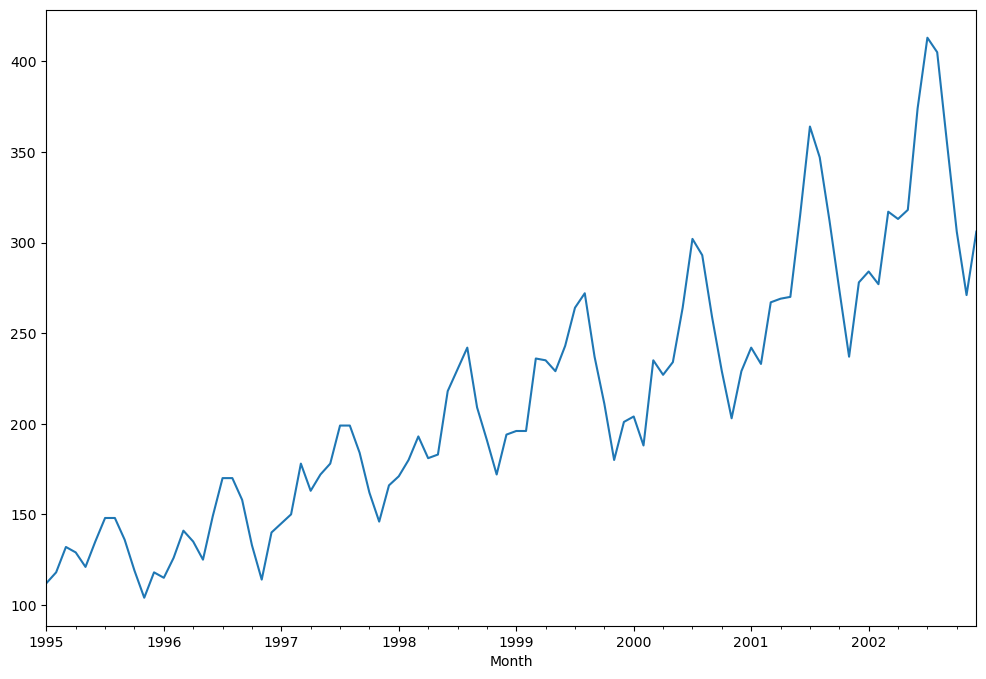

In [5]:
plt.figure(figsize=(12,8))
airlines.Passengers.plot()
plt.show()

From the above plot We can see that there is <b>Level</b>, <b>Upward trend</b> with <b>multiplicative seasonality</b>

In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [7]:
airlines.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


<Axes: xlabel='Month', ylabel='Passengers'>

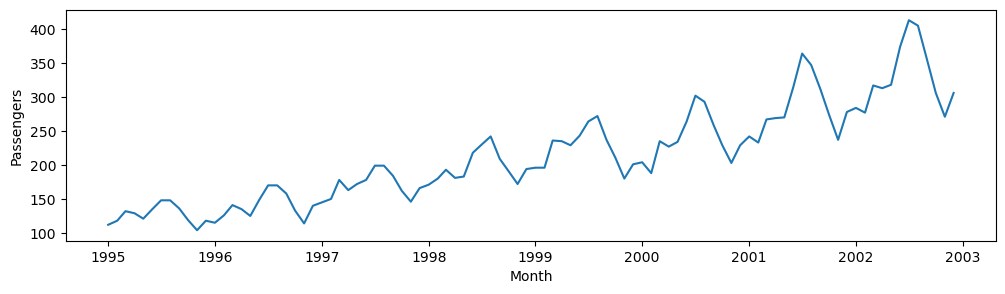

In [8]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=airlines)

96 datapoints to 70-30 split gives (67,29)<br>
Let's split to train-test in this way

In [9]:
Train = airlines.head(67)
Test = airlines.tail(29)

## SimpleExpSmoothing

In [10]:
def RMSE(pred,org):
    temp = (np.array(pred) - np.array(org)) ** 2
    mean_squared_error = np.mean(temp)
    rmse_value = np.sqrt(mean_squared_error)
    return rmse_value

In [11]:
for i in [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    print("RMSE value for smoothing at ", i, ":", RMSE(pred_ses,Test.Passengers))

RMSE value for smoothing at  0.1 : 84.21157138955378
RMSE value for smoothing at  0.2 : 73.046114055039
RMSE value for smoothing at  0.3 : 65.61109103654641
RMSE value for smoothing at  0.4 : 59.92033287984074
RMSE value for smoothing at  0.5 : 56.03298318060058
RMSE value for smoothing at  0.6 : 53.65257882442885
RMSE value for smoothing at  0.7 : 52.37713096521
RMSE value for smoothing at  0.8 : 51.87704596243022
RMSE value for smoothing at  0.9 : 51.908685920588496


C:\Users\sailo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sailo\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\sailo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sailo\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\sailo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [12]:
pred_ses

2000-08-01    297.893346
2000-09-01    297.893346
2000-10-01    297.893346
2000-11-01    297.893346
2000-12-01    297.893346
2001-01-01    297.893346
2001-02-01    297.893346
2001-03-01    297.893346
2001-04-01    297.893346
2001-05-01    297.893346
2001-06-01    297.893346
2001-07-01    297.893346
2001-08-01    297.893346
2001-09-01    297.893346
2001-10-01    297.893346
2001-11-01    297.893346
2001-12-01    297.893346
2002-01-01    297.893346
2002-02-01    297.893346
2002-03-01    297.893346
2002-04-01    297.893346
2002-05-01    297.893346
2002-06-01    297.893346
2002-07-01    297.893346
2002-08-01    297.893346
2002-09-01    297.893346
2002-10-01    297.893346
2002-11-01    297.893346
2002-12-01    297.893346
Freq: MS, dtype: float64

## Holt's 

In [13]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hw,Test.Passengers)

C:\Users\sailo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


43.92891203534473

In [24]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.3)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hw,Test.Passengers)

C:\Users\sailo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


42.46938106219474

In [25]:
pred_hw

2000-08-01    262.007626
2000-09-01    264.835679
2000-10-01    267.663731
2000-11-01    270.491783
2000-12-01    273.319836
2001-01-01    276.147888
2001-02-01    278.975940
2001-03-01    281.803993
2001-04-01    284.632045
2001-05-01    287.460097
2001-06-01    290.288150
2001-07-01    293.116202
2001-08-01    295.944254
2001-09-01    298.772307
2001-10-01    301.600359
2001-11-01    304.428411
2001-12-01    307.256464
2002-01-01    310.084516
2002-02-01    312.912568
2002-03-01    315.740621
2002-04-01    318.568673
2002-05-01    321.396725
2002-06-01    324.224778
2002-07-01    327.052830
2002-08-01    329.880883
2002-09-01    332.708935
2002-10-01    335.536987
2002-11-01    338.365040
2002-12-01    341.193092
Freq: MS, dtype: float64

From the above methods, Holt's method seems to give the least RMSE value, So we can go for <b>Holt's method</b> to forecast this data.<br>

Since we don't have any categorical variables for this dataset, there was no need to create/use dummy variables.<br>

In [107]:
Reportdf = pd.DataFrame(data={'DataSet':['Airlines', 'Airlines'], 
                              'Forecasting Method':['Simple Exponential Smooothing',"Holt's"],
                             'RMSE': [51.87, 42.46]})

In [108]:
Reportdf

,DataSet,Forecasting Method,RMSE
0,Airlines,Simple Exponential Smooothing,51.87
1,Airlines,Holt's,42.46


## Forecast the CocaCola prices data set and which model you will use for Forecasting

In [17]:
cocacola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [15]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [28]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


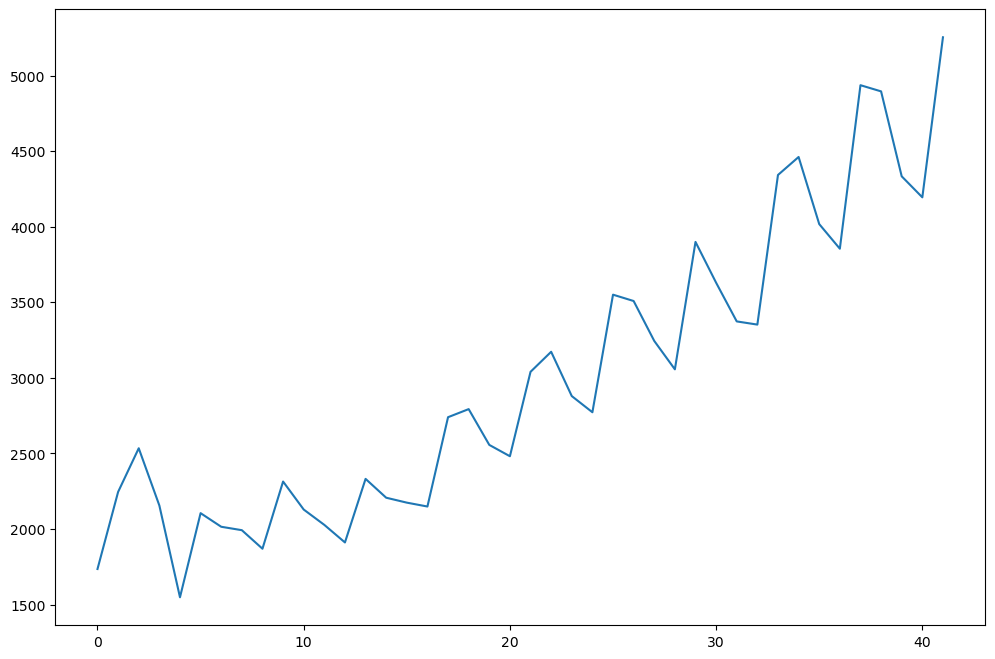

In [29]:
plt.figure(figsize=(12,8))
cocacola.Sales.plot()
plt.show()

Since the Quarter column is object we can try to convert to date time

In [36]:
def convert_to_datetime(quarter_str):
    year = int(quarter_str.split('_')[1])
    quarter = quarter_str.split('_')[0]
    quarter_map = {'Q1': '-03-31', 'Q2': '-06-30', 'Q3': '-09-30', 'Q4': '-12-31'}
    
    return pd.to_datetime(str(year) + quarter_map[quarter])

In [37]:
cocacola['Quarter'] = cocacola['Quarter'].apply(convert_to_datetime)

In [38]:
cocacola.head()

,Quarter,Sales
0,1986-03-31,1734.827000
1,1986-06-30,2244.960999
2,1986-09-30,2533.804993
3,1986-12-31,2154.962997
4,1987-03-31,1547.818996


In [40]:
cocacola.set_index('Quarter', inplace=True)

In [41]:
cocacola.head()

,Sales
Quarter,
1986-03-31,1734.827000
1986-06-30,2244.960999
1986-09-30,2533.804993
1986-12-31,2154.962997
1987-03-31,1547.818996


In [42]:
split_index = int(0.7 * len(cocacola))
train_data, test_data = cocacola[:split_index], cocacola[split_index:]

# Check the lengths of the split data
print("Training data:", train_data)
print("Testing data:", test_data)

Training data:                   Sales
Quarter                
1986-03-31  1734.827000
1986-06-30  2244.960999
1986-09-30  2533.804993
1986-12-31  2154.962997
1987-03-31  1547.818996
1987-06-30  2104.411995
1987-09-30  2014.362999
1987-12-31  1991.746998
1988-03-31  1869.049999
1988-06-30  2313.631996
1988-09-30  2128.320000
1988-12-31  2026.828999
1989-03-31  1910.603996
1989-06-30  2331.164993
1989-09-30  2206.549995
1989-12-31  2173.967995
1990-03-31  2148.278000
1990-06-30  2739.307999
1990-09-30  2792.753998
1990-12-31  2556.009995
1991-03-31  2480.973999
1991-06-30  3039.522995
1991-09-30  3172.115997
1991-12-31  2879.000999
1992-03-31  2772.000000
1992-06-30  3550.000000
1992-09-30  3508.000000
1992-12-31  3243.859993
1993-03-31  3056.000000
Testing data:              Sales
Quarter           
1993-06-30  3899.0
1993-09-30  3629.0
1993-12-31  3373.0
1994-03-31  3352.0
1994-06-30  4342.0
1994-09-30  4461.0
1994-12-31  4017.0
1995-03-31  3854.0
1995-06-30  4936.0
1995-09-30  4895.0

In [44]:
train_data.shape

(29, 1)

In [45]:
test_data.shape

(13, 1)

In [57]:
X_train = np.array(train_data.values).flatten()
X_test = np.array(test_data.values).flatten()

In [58]:
X_train

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        ])

## ARIMA

In [59]:
history = [x for x in X_train]

predictions = list()

for i in range(len(X_test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = X_test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(X_test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
>Predicted=4017.000, Expected=3854.000
>Predicted=3854.000, Expected=4936.000
>Predicted=4936.000, Expected=4895.000
>Predicted=4895.000, Expected=4333.000
>Predicted=4333.000, Expected=4194.000
>Predicted=4194.000, Expected=5253.000
RMSE: 601.060


In [62]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    train, test = np.array(train.values).flatten(), np.array(test.values).flatten()
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [66]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(cocacola, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [67]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(cocacola.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1574.748
ARIMA(0, 0, 1) RMSE=1080.505
ARIMA(0, 0, 2) RMSE=664.686
ARIMA(0, 1, 0) RMSE=601.060
ARIMA(0, 1, 1) RMSE=562.618
ARIMA(0, 1, 2) RMSE=542.497
ARIMA(0, 2, 0) RMSE=842.628
ARIMA(0, 2, 1) RMSE=593.107
ARIMA(0, 2, 2) RMSE=476.125
ARIMA(1, 0, 0) RMSE=641.904
ARIMA(1, 0, 1) RMSE=589.743
ARIMA(1, 0, 2) RMSE=568.897
ARIMA(1, 1, 0) RMSE=600.086
ARIMA(1, 1, 1) RMSE=567.044
ARIMA(1, 1, 2) RMSE=543.736
ARIMA(1, 2, 0) RMSE=847.502
ARIMA(1, 2, 1) RMSE=637.202
ARIMA(1, 2, 2) RMSE=562.775
ARIMA(2, 0, 0) RMSE=644.800
ARIMA(2, 0, 1) RMSE=628.915
ARIMA(2, 0, 2) RMSE=570.165
ARIMA(2, 1, 0) RMSE=458.597
ARIMA(2, 1, 1) RMSE=460.052
ARIMA(2, 1, 2) RMSE=363.052
ARIMA(2, 2, 0) RMSE=699.722
ARIMA(2, 2, 1) RMSE=55231.641
ARIMA(2, 2, 2) RMSE=368.999
Best ARIMA(2, 1, 2) RMSE=363.052


In [73]:
model = ARIMA(X_train, order=(2,1,0))
model_fit = model.fit()

In [74]:
cocacola['forecast']=model_fit.forecast(steps=10)[0]
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -198.741
Date:                Tue, 24 Oct 2023   AIC                            403.482
Time:                        11:23:23   BIC                            407.478
Sample:                             0   HQIC                           404.704
                                 - 29                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1772      0.215     -0.824      0.410      -0.599       0.244
ar.L2         -0.5138      0.257     -1.996      0.046      -1.018      -0.009
sigma2      8.126e+04   3.07e+04      2.647      0.008    2.11e+04    1.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.98   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.08   Prob(JB):                         0.80
Heteroskedasticity (H):               0.66   Skew:                             0.00
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Quarter'>

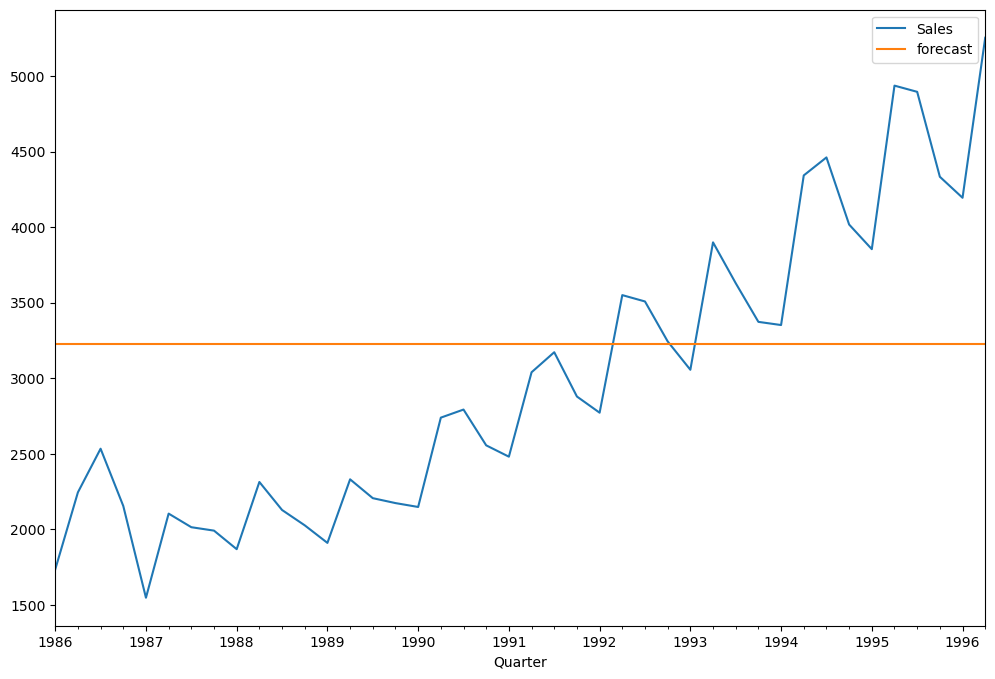

In [77]:
cocacola[['Sales','forecast']].plot(figsize=(12,8))

In [78]:
cocacola

,Sales,forecast
Quarter,,
1986-03-31,1734.827000,3224.988244
1986-06-30,2244.960999,3224.988244
1986-09-30,2533.804993,3224.988244
1986-12-31,2154.962997,3224.988244
1987-03-31,1547.818996,3224.988244
1987-06-30,2104.411995,3224.988244
1987-09-30,2014.362999,3224.988244
1987-12-31,1991.746998,3224.988244
1988-03-31,1869.049999,3224.988244


## SimpleExpSmoothing

In [89]:
cocacola = cocacola.drop(columns='forecast')

In [90]:
split_index = int(0.7 * len(cocacola))
train_data, test_data = cocacola[:split_index], cocacola[split_index:]

# Check the lengths of the split data
print("Training data:", train_data)
print("Testing data:", test_data)

Training data:                   Sales
Quarter                
1986-03-31  1734.827000
1986-06-30  2244.960999
1986-09-30  2533.804993
1986-12-31  2154.962997
1987-03-31  1547.818996
1987-06-30  2104.411995
1987-09-30  2014.362999
1987-12-31  1991.746998
1988-03-31  1869.049999
1988-06-30  2313.631996
1988-09-30  2128.320000
1988-12-31  2026.828999
1989-03-31  1910.603996
1989-06-30  2331.164993
1989-09-30  2206.549995
1989-12-31  2173.967995
1990-03-31  2148.278000
1990-06-30  2739.307999
1990-09-30  2792.753998
1990-12-31  2556.009995
1991-03-31  2480.973999
1991-06-30  3039.522995
1991-09-30  3172.115997
1991-12-31  2879.000999
1992-03-31  2772.000000
1992-06-30  3550.000000
1992-09-30  3508.000000
1992-12-31  3243.859993
1993-03-31  3056.000000
Testing data:              Sales
Quarter           
1993-06-30  3899.0
1993-09-30  3629.0
1993-12-31  3373.0
1994-03-31  3352.0
1994-06-30  4342.0
1994-09-30  4461.0
1994-12-31  4017.0
1995-03-31  3854.0
1995-06-30  4936.0
1995-09-30  4895.0

In [91]:
for i in [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    ses_model = SimpleExpSmoothing(train_data["Sales"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
    print("RMSE value for smoothing at ", i, ":", RMSE(pred_ses,test_data.Sales))

RMSE value for smoothing at  0.1 : 1531.5981018891005
RMSE value for smoothing at  0.2 : 1272.4654923734838
RMSE value for smoothing at  0.3 : 1186.3197173375042
RMSE value for smoothing at  0.4 : 1162.4463990835193
RMSE value for smoothing at  0.5 : 1166.0921867347736
RMSE value for smoothing at  0.6 : 1183.2229749361218
RMSE value for smoothing at  0.7 : 1206.5662998945745
RMSE value for smoothing at  0.8 : 1231.4092807355216
RMSE value for smoothing at  0.9 : 1254.4205699104766


In [104]:
ses_model = SimpleExpSmoothing(train_data["Sales"]).fit(smoothing_level=0.7)
pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
print("RMSE value for smoothing at ", i, ":", RMSE(pred_ses,test_data.Sales))

RMSE value for smoothing at  0.7 : 1206.5662998945745


In [105]:
pred_ses

1993-06-30    3131.373319
1993-09-30    3131.373319
1993-12-31    3131.373319
1994-03-31    3131.373319
1994-06-30    3131.373319
1994-09-30    3131.373319
1994-12-31    3131.373319
1995-03-31    3131.373319
1995-06-30    3131.373319
1995-09-30    3131.373319
1995-12-31    3131.373319
1996-03-31    3131.373319
1996-06-30    3131.373319
Freq: Q-DEC, dtype: float64

## Holt's

In [92]:
hw_model = Holt(train_data["Sales"]).fit(smoothing_level=0.2)
pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
RMSE(pred_hw,test_data.Sales)

503.8464692770688

In [93]:
hw_model = Holt(train_data["Sales"]).fit(smoothing_level=0.4)
pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
RMSE(pred_hw,test_data.Sales)

919.455466564564

In [94]:
for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    hw_model = Holt(train_data["Sales"]).fit(smoothing_level=i)
    pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
    print(RMSE(pred_hw,test_data.Sales))

503.8464692770688
581.1707731960479
919.455466564564
1329.0331974025353
1377.8598426558547
1340.4797270715808


In [97]:
hw_model = Holt(train_data["Sales"]).fit(smoothing_level=0.2)
pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
RMSE(pred_hw,test_data.Sales)

503.8464692770688

In [98]:
pred_hw

1993-06-30    3380.877759
1993-09-30    3466.434010
1993-12-31    3551.990261
1994-03-31    3637.546512
1994-06-30    3723.102763
1994-09-30    3808.659014
1994-12-31    3894.215265
1995-03-31    3979.771516
1995-06-30    4065.327767
1995-09-30    4150.884018
1995-12-31    4236.440269
1996-03-31    4321.996520
1996-06-30    4407.552771
Freq: Q-DEC, dtype: float64

In [103]:
test_data.head()

,Sales
Quarter,
1993-06-30,3899.0
1993-09-30,3629.0
1993-12-31,3373.0
1994-03-31,3352.0
1994-06-30,4342.0


In [109]:
Reportdf = pd.concat([Reportdf, pd.DataFrame(data={'DataSet':['Cocacola', 'Cocacola', 'Cocacola'], 
                              'Forecasting Method':['ARIMA','Simple Exponential Smooothing',"Holt's"],
                             'RMSE': [363.05, 1206.56, 503.84]})], axis=0)

In [111]:
Reportdf.reset_index(inplace=True)

In [113]:
Reportdf = Reportdf.drop(columns='index')

In [114]:
Reportdf

,DataSet,Forecasting Method,RMSE
0,Airlines,Simple Exponential Smooothing,51.87
1,Airlines,Holt's,42.46
2,Cocacola,ARIMA,363.05
3,Cocacola,Simple Exponential Smooothing,1206.56
4,Cocacola,Holt's,503.84


From the above methods, ARIMA method seems to give the least RMSE value, but on the other hand <b> the prediction values of Holt's method seems to be more near to the data </b>and comparing with all the three models it's RMSE value is also pretty good So we can go for <b>Holt's method</b> to forecast this data.<br>

Since we don't have any categorical variables for this dataset, there was no need to create/use dummy variables.<br>